In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.metrics import structural_similarity as ssim

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array

from keras import layers

from skimage.metrics import structural_similarity as ssim

2023-08-16 12:44:27.999199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-08-16 12:44:27.999212: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SIZE=600
SUBSET_SIZE=200

In [1]:
dataset=os.listdir('generated_dataset/processed')
np.random.shuffle(dataset)
train_set=dataset[0:200]
test_set=dataset[200:280]
valid_set=dataset[280:320]

NameError: name 'os' is not defined

In [4]:
path='generated_dataset/processed/'

train_hr=[]
for img_path in tqdm(train_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    train_hr.append(img)
train_hr=np.array(train_hr)

train_lr=[]
for img_path in tqdm(train_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    train_lr.append(img)
train_lr=np.array(train_lr)

test_hr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)

test_lr=[]
for img_path in tqdm(test_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)

valid_hr=[]
for img_path in tqdm(valid_set):
    img=cv2.imread(path+img_path)
    img=img.astype('float32')/255
    valid_hr.append(img)
valid_hr=np.array(valid_hr)

valid_lr=[]
for img_path in tqdm(valid_set):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    valid_lr.append(img)
valid_lr=np.array(valid_lr)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 431.30it/s]


/tmp/ipykernel_12640/3907932796.py:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print(ssim(img,target,multichannel=True))


0.80765945


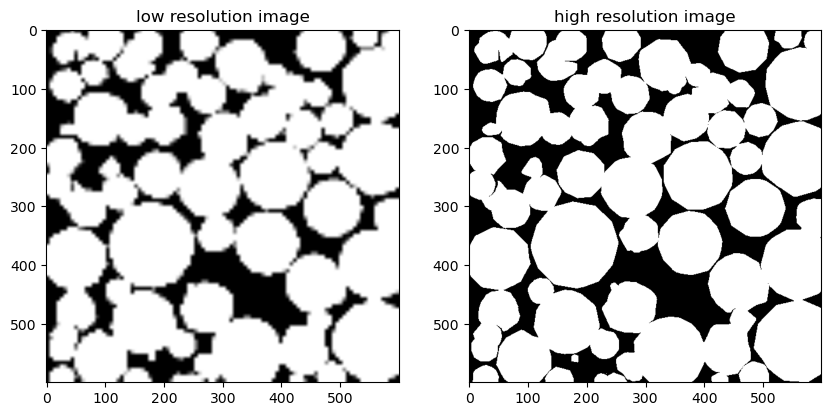

In [5]:
i=np.random.randint(0,SUBSET_SIZE)

img,target=train_lr[i],train_hr[i]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title('low resolution image')
ax2.imshow(target)
ax2.set_title('high resolution image')

print(ssim(img,target,multichannel=True))

In [6]:
input=Input(shape=(SIZE,SIZE,3))
x=tf.keras.layers.Conv2D(32,9,padding='same',activation='relu') (input)
x=tf.keras.layers.Conv2D(16,1,padding='same',activation='relu') (x)
output=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (x)

model=Model(input,output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 600, 600, 32)      7808      
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 600, 16)      528       
                                                                 
 conv2d_2 (Conv2D)           (None, 600, 600, 3)       1203      
                                                                 
Total params: 9,539
Trainable params: 9,539
Non-trainable params: 0
_________________________________________________________________


2023-08-16 12:45:09.676582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-16 12:45:09.676705: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-08-16 12:45:09.676731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-08-16 12:45:09.676752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dl

In [ ]:
model.fit(train_lr,train_hr,epochs=3,batch_size=1,validation_data=(valid_lr,valid_hr))

2023-08-16 12:45:20.420850: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 967680000 exceeds 10% of free system memory.


Epoch 1/3


2023-08-16 12:45:20.660185: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 967680000 exceeds 10% of free system memory.
2023-08-16 12:45:21.245360: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 576000000 exceeds 10% of free system memory.
2023-08-16 12:45:21.245400: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 576000000 exceeds 10% of free system memory.


  1/224 [..............................] - ETA: 2:56 - loss: 0.7360

2023-08-16 12:45:21.577205: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 349920000 exceeds 10% of free system memory.


 24/224 [==>...........................] - ETA: 1:23 - loss: 0.2568

In [8]:
model.save('super_resolution.h5')

In [9]:
def mse(img,target):
    mse=np.mean((img-target)**2)
    return mse

In [10]:
def psnr(img,target):
    psnr=10*np.log10(1/mse(img,target))
    return psnr

In [31]:
model_path = 'super_resolution.h5'

model=tf.keras.models.load_model(model_path)

In [32]:
def evaluate_model(test_hr,test_lr,model):
    
    i=np.random.randint(0,len(test_hr))

    img,target=test_lr[i],test_hr[i]
    output=model.predict(img.reshape(1,SIZE,SIZE,3))[0]

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
    ax1.imshow(img)
    ax1.set_title('low resolution image')
    ax2.imshow(output)
    ax2.set_title('model output')
    ax3.imshow(target)
    ax3.set_title('high resolution image')

    print('')
    print('SSIM between LR image and HR image: {}'.format(ssim(img,target,channel_axis=-1)))
    print('SSIM between model output and HR image: {}'.format(ssim(output,target,channel_axis=-1)))
    print('')
    print('MSE between LR image and HR image: {}'.format(mse(img,target)))
    print('MSE between model output and HR image: {}'.format(mse(output,target)))
    print('')
    #print('PSNR between LR image and HR image: {}'.format(psnr(img,target)))
    #print('PSNR between model output and HR image: {}'.format(psnr(output,target)))
    
    return img,output,target

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



SSIM between LR image and HR image: 0.8133471608161926
SSIM between model output and HR image: 0.8783569931983948

MSE between LR image and HR image: 0.022532915696501732
MSE between model output and HR image: 0.01722221076488495



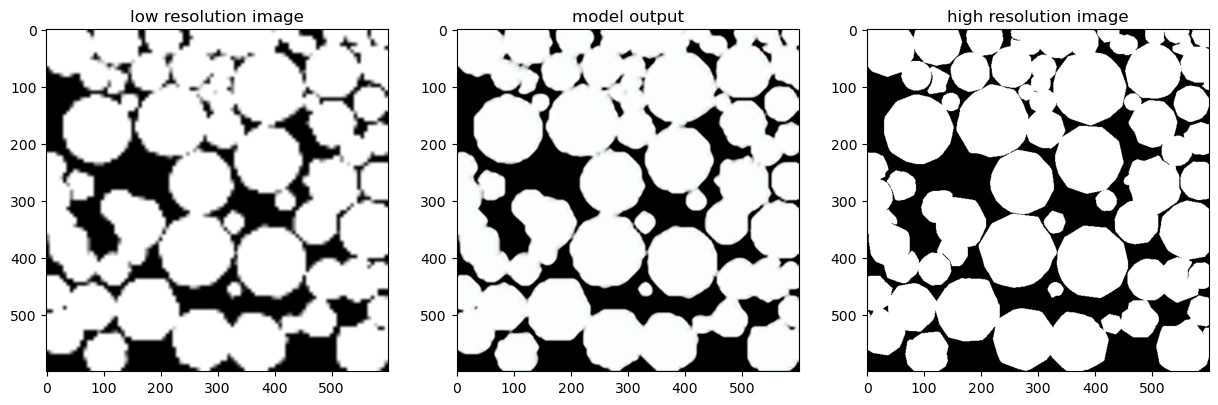

In [33]:
img,output,target=evaluate_model(test_hr,test_lr,model)